# Evaluación de Modelos

## Preámbulo

In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

print(pd.Series(y).value_counts())


# Creamos datos con clases no balanceadas:  
# Clase negativa (0) is 'no es digito 1' 
# Clase positiva (1) is 'digito 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Clase negativa y positiva',np.bincount(y_binary_imbalanced) )   # La clase negativa es la mas frecuente

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64
Clase negativa y positiva [1615  182]


## Clasificador Dummy 


Es un clasificador que hace predicciones usando reglas simples, que pueden ser útiles como base para la comparación con clasificadores reales, especialmente con clases desequilibradas.

In [2]:
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# (0) es mas frecuente
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# de modo que este clasificador 'most_frequent' predice la clase cero
y_dummy_predictions = dummy_majority.predict(X_test)

print('Predicciones de DummyClassifier: ',y_dummy_predictions[1:10])

print('Score de Dummy',dummy_majority.score(X_test, y_test))


# SUPPORT
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
print('Score de SVC',svm.score(X_test, y_test))



Predicciones de DummyClassifier:  [0 0 0 0 0 0 0 0 0]
Score de Dummy 0.9044444444444445
Score de SVC 0.9777777777777777


### Matriz de confusion

In [3]:
from sklearn.metrics import confusion_matrix
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)
print('Dummy classifier\n', confusion)

Dummy classifier
 [[407   0]
 [ 43   0]]


In [4]:
# Produce predicciones aleatorias con la misma proporción de clases que el conjunto de entrenamiento.
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Proporcional (dummy classifier)\n', confusion)

Proporcional (dummy classifier)
 [[363  44]
 [ 38   5]]


In [5]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine (linear kernel, C=1)\n', confusion)

Support vector machine (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Regresion logistica \n', confusion)

Regresion logistica 
 [[401   6]
 [  8  35]]


/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Arbol de decision (max_depth = 2)\n', confusion)

Arbol de decision (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Metricas de Evaluacion

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Accuracy = VP + TN / (VP + TN + FP + FN)
# Precision = VP / (VP + FP)
# Recall = VP / (VP + FN)  Also known as sensitivity, or True Positive Rate
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60


In [9]:
# En un reporte
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [10]:
print('Proporcional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Regresion Logistica\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Arbol de decision\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Proporcional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.89      0.90       407
           1       0.10      0.12      0.11        43

    accuracy                           0.82       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.82      0.82       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Regresion Logistica
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.97   

### Curvas ROC, Area-Under-Curve (AUC)

(-55.038215145033256, -19.559453136681913, 18.807953187796432)


/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


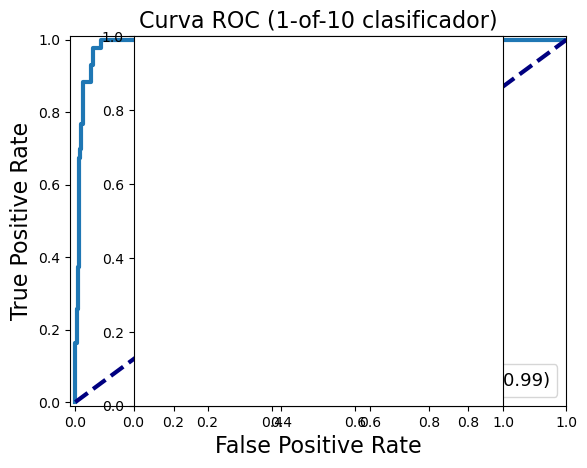

In [11]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
#y_score_lr = lr.fit(X_train, y_train).predict(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

print((y_score_lr.min(),y_score_lr.mean(),y_score_lr.max()))


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='Curva LogRegr ROC (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Curva ROC (1-of-10 clasificador)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00


gamma = 0.10  accuracy = 0.90   AUC = 0.98


gamma = 0.20  accuracy = 0.90   AUC = 0.66


gamma = 1.00  accuracy = 0.90   AUC = 0.50


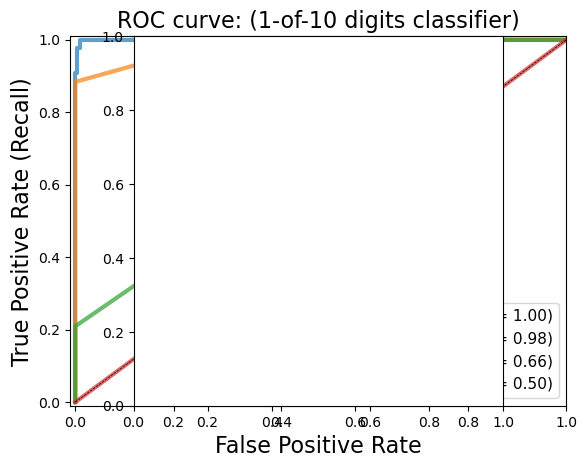

In [12]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

## Seleccion de modelos

### Cross Validation (validacion cruzada)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]


Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


### Grid search

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676


Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


#### Metricas de evaluacion disponibles

In [15]:
from sklearn.metrics import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

**Ejemplo**

**Optimizando un clasificador para diferentes metricas**

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5341666666666668


Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9214285714285714


Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.525632875724172


Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8918231641920815


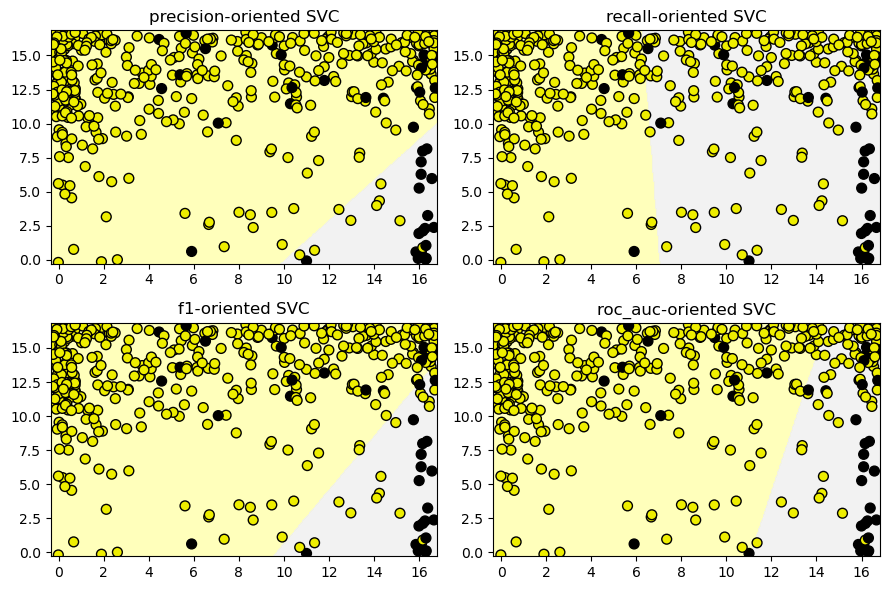

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Cree un vector de entrada de dos características que coincida con el diagrama de ejemplo anterior
# Agitamos los puntos (agregamos una pequeña cantidad de ruido aleatorio) en caso de que haya áreas
# en el espacio de variables donde muchas observaciones tengan las mismas variables.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()